<hr/>

# Introduction to Data Science - Fall 2021
**Jinchao Feng and Christian Kuemmerle** - introdsfall2021@jh.edu <br/>

- Probability Density Function (PDF)
- Cummulative Density Function (CDF)
- Moments

<hr/>

### Outliers
- What if just one element is too large, e.g., erroneously becomes $+\infty$
- Sample average $\bar{x} \rightarrow +\infty$
- Sample variance explodes, too

    **Ouch !!**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000;
x = np.random.randn(N);
y = np.array(x,copy=True) # copy the ndarray x to another ndarray y
y[0] = 1e5
(x[0:10],y[0:10])

(array([-0.22462965, -0.90475624,  1.34650101, -0.60340389,  0.62192743,
        -0.10531103, -0.25219372, -0.49870343,  0.69109534,  0.20264329]),
 array([ 1.00000000e+05, -9.04756236e-01,  1.34650101e+00, -6.03403888e-01,
         6.21927428e-01, -1.05311027e-01, -2.52193717e-01, -4.98703431e-01,
         6.91095341e-01,  2.02643289e-01]))

Plot histogram of original Gaussian vector x with 'nr_bins' bins:

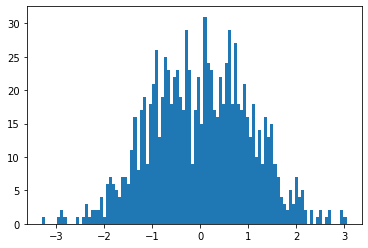

In [2]:
nr_bins = 100
plt.hist(x,bins=nr_bins);

Plot histogram of original Gaussian vector x with 'nr_bins' bins:

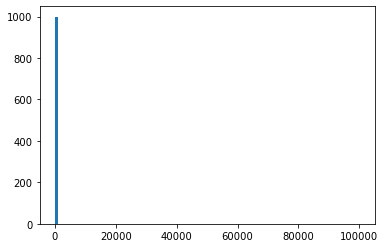

In [3]:
plt.hist(y,100);

### Robustness
- Robust against outliers? What fraction can we tolerate?
- Median is more robust than the mean

In [4]:
print ('Average old vs new: %f %f' % (np.mean(y) , np.mean(x)))
print ('Median  old vs new: %f %f' % (np.median(y), np.median(x)))

Average old vs new: 100.006091 0.005866
Median  old vs new: 0.029219 0.025777


### [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

Exhaustive package containing many functions related to scientific computing, mathematics and statistics. As powerful as MATLAB. Builds on numpy.

We use module: [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats)

In [5]:
from scipy import stats
import statistics

(statistics.variance(x), statistics.variance(y))

(1.070187669891594, 9999999.85070249)

In [6]:
(stats.tvar(x), stats.tvar(y))

(1.070187669891594, 9999999.850702493)

## Probability Distributions

Crucial concept to model uncertainties!

**Random variable $X$**: Function that maps outcomes of random experiments to a set of outcomes.
<br>
**Probability distribution $P$**: Measures the probability of an outcome/set of outcomes.

### Discrete Probability Distributions

Only a _discrete_ set of outcomes, e.g., $S = \{x_1,x_2,\ldots,x_n\}$.

**Probability Mass Function (PMF)**: Function that maps the outcomes to the probability that random variable takes this outcome.

$$ p(x_k) = P(X = x_k)$$
for each $k = 1,\ldots n$.

#### Example 1
Define discrete probability distribution with outcomes $\{x_1,x_2,\ldots,x_n\} = \{0,1,2,3,4,5,6\}$ and respective probabilities $p(x_1) = 0.1, p(x_2) = 0.2, p(x_3) = 0.3, p(x_4) = 0.1, p(x_5) = 0.1, p(x_6) = 0.0, p(x_7) = 0.2$.

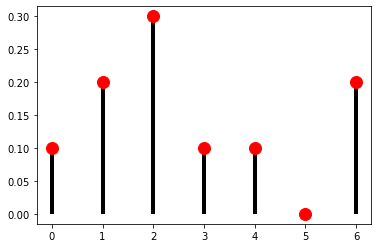

In [7]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name='custm', values=(xk, pk))

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='k', lw=4)
plt.show()

#### Example 2
Discrete uniform distribution with outcomes $\{x_1,x_2,\ldots,x_n\}$.

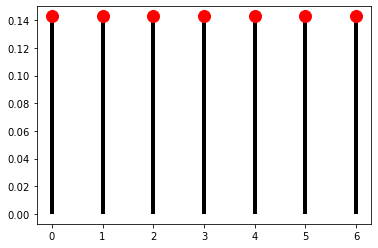

In [8]:
duniform = stats.randint(0, 7)
fig, ax = plt.subplots(1, 1)
ax.plot(xk, duniform.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, duniform.pmf(xk), colors='k', linestyles='-', lw=4)
plt.show()

### Continuous Probability Distributions

**Probability Density Function (PDF)**: Non-negative function $p$ such that it integrates to $1$, i.e.,

> $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$

 and

> $p(x) \geq 0$ everywhere.

- Can be used to define random variable $X$ whos distribution:

> $\displaystyle P(a \leq X \leq b) = \int_a^b p(x)\,dx$

- **Example 1**: (Continuous) uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- **Example 2**: Gaussian or normal distribution

> $\displaystyle  G\left(x;\mu,\sigma^2\right) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$

- **Example 3**: Log-normal: Distribution such that if $X$ is log-normal, $Y=ln(X)$ is normal.

### Gauss on Money!

<!--<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/DEU-10m-anv.jpg/640px-DEU-10m-anv.jpg' width=400 align=left>-->

<img src='files/640px-DEU-10m-anv.jpg' width=400 align=left>

- Even the formula

<img src='files/10DM.jpg' width=400 align=left>

**Cumulative Distribution Function (CDF)**: Can be used with both continuous and discrete distributions.

- Integral up to given outcome $x$: Probability of being lesser or equal than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


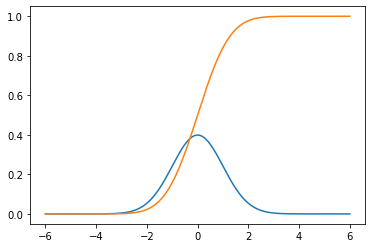

In [10]:
from scipy.stats import norm as gaussian
x = np.linspace(-6,6,1000) 
mu, sig = 0, 1
plot(x, gaussian.pdf(x,mu,sig));
plot(x, gaussian.cdf(x,mu,sig));
#xlim(-2,2)

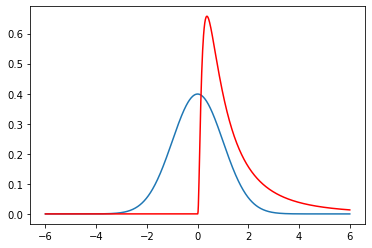

In [11]:
from scipy.stats import lognorm
plot(x, gaussian.pdf(x,0,sig));
plot(x, lognorm.pdf(x,sig), color='r');

### Characterization of PDFs

- Expectation value of $X$

> $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$

- Expectation value of any $f(X)$

> $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$

- Moments 

> $\displaystyle \mathbb{E}[X^k]$
    
- Central moments 

> $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$

- Variance

> $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$

- Standard deviation

> $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$

- Normalized moments

> $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$

- Skewness

> 3rd normalized moment ($k$=3)

- Kurtosis

> 4th normalized moment ($k$=4)
 


<img src="files/skew.png" width=400 align=left>

In [ ]:
mean, var, skew, kurt = gaussian.stats(mu, sig, moments='mvsk');
mu, sig, mean, var, skew, kurt

In [ ]:
mean, var, skew, kurt = lognorm.stats(sig, moments='mvsk');
sig, mean, var, skew, kurt

<h1><font color="darkblue">Python by Examples</font></h1>

- tuple list function class for map  lambda import

- numpy matplotlib 

In [ ]:
# tuple
t = (1,2)
t = 100, 0.1
N, mu = t
print (N)

In [ ]:
# list
l = [1,2,3,4,5]
np.array([l,l], dtype=np.float)

In [ ]:
# function
def f(x,k=2):
    return x**k

f3 = f(3)
print (f3)
f(2), f(2,2), f(2,3), f(2,k=4), f3

In [ ]:
import math

# object-oriented programming
class Robot(object):
    
    def __init__(self, x=0, y=0, angle=0):
        self.x, self.y, self.angle = x, y, angle
        self.path = [(x,y)]
    
    def move(self, l):
        self.x += l * math.cos(self.angle)
        self.y += l * math.sin(self.angle)
        self.path.append((self.x, self.y))
        
    def left(self, a):
        self.angle += a
        
    def right(self, a):
        self.left(-a)
        

In [ ]:
r = Robot()
r.move(10)

In [ ]:
r.left(math.pi/2)
r.path

In [ ]:
r.move(10)
r.right(np.pi/4)
r.path

In [ ]:
r.move(1)
r.path

In [ ]:
# lambda expressions
g = lambda x: x*x
g(2)

In [ ]:
# using math functions and routines
import math

math.pi, math.sin(1.57)

In [ ]:
# same using numpy's methods
np.pi, np.sin(1.57), np.sin([0,np.pi,1.57])

In [ ]:
# numpy methods work also on arrays, e.g., elementwise
np.sin( [1.57, 3.14, np.pi] ) 

In [ ]:
# arrays: vectors and matrices
import numpy as np
l = [1,2,3]
a = np.array([l,l], dtype=np.int32)
print (a.shape)
print (a.T)

In [ ]:
[l,l]

In [ ]:
b = a.T.dot(a)
b

In [ ]:
a.T @ a

In [ ]:
# slicing arrays
print (b)
b[:2,1:2]

In [ ]:
# componentwise operations
print (np.sin(l))

for s in map(math.sin, l): 
    print (s)

In [ ]:
[math.sin(x) for x in l]

In [ ]:
plt.plot([1,2,3,4,5],[5,4,5,2,4], 'ro-');
plt.savefig('test.png') 
# change extension to .pdf to have it in that format